In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

X = df['Review'].astype(str)
y = df['Rating']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Malo\AppData\Local\Temp\ipykernel_10992\3889352765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Review"].astype(str).apply(lambda x: len((str(x).split()))))


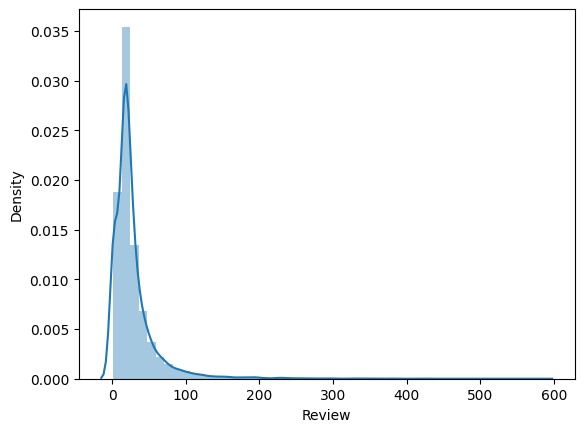

Mean text length: 28.00908905228758


C:\Users\Malo\AppData\Local\Temp\ipykernel_10992\3889352765.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Review"].astype(str).apply(lambda x: len(set(str(x).split()))))


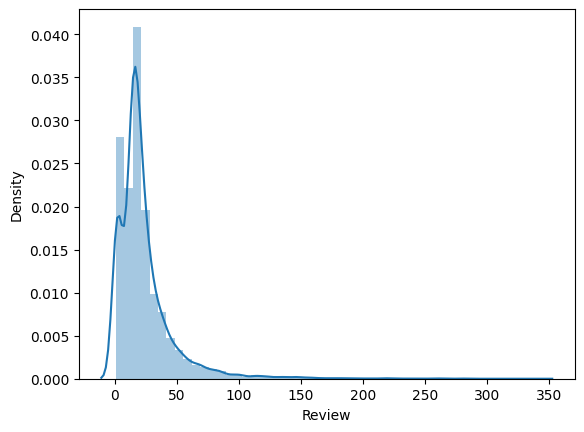

Mean number of unique words: 23.75827205882353


In [4]:
# distribution of the text length
sns.distplot(df["Review"].astype(str).apply(lambda x: len((str(x).split()))))
plt.show()

# mean text length
mean_length = df["Review"].astype(str).apply(lambda x: len((str(x).split()))).mean()
print(f"Mean text length: {mean_length}")

# distribution of the number of unique words
sns.distplot(df["Review"].astype(str).apply(lambda x: len(set(str(x).split()))))
plt.show()

# number of unique words mean
mean_nb_unique_words = df["Review"].astype(str).apply(lambda x: len(set(str(x).split()))).mean()
print(f"Mean number of unique words: {mean_nb_unique_words}")

In [5]:
# Parameters according to the visualizations above
max_words = 50
max_sequence_length = 100

# tokenizer
def tokenize_training_data(texts, max_words, max_sequence_length):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    
    sequences = tokenizer.texts_to_sequences(texts)
    
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
    
    return tokenizer, padded_sequences

tokenizer, X_train = tokenize_training_data(X_train, max_words, max_sequence_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_sequence_length)

In [6]:
# change the labels to categorical
y_train = to_categorical(y_train - 1, num_classes=5)
y_test = to_categorical(y_test - 1, num_classes=5)

# early stopping
early_stopping = EarlyStopping(monitor="loss", patience=3)

In [7]:
# LSTM model
embedding_dim = 32
lstm_units = 32

# initialize the model with parameters adapted to a multi-class classification task
modelLSTM = keras.Sequential()
modelLSTM.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
modelLSTM.add(LSTM(units=lstm_units))
modelLSTM.add(Dense(5, activation='softmax'))

modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
modelLSTM.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Evaluation of the model each epoch
loss, accuracy = modelLSTM.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/100
3917/3917 [==============================] - 262s 66ms/step - loss: 1.1984 - accuracy: 0.5054
Epoch 2/100
3917/3917 [==============================] - 260s 66ms/step - loss: 1.1226 - accuracy: 0.5387
Epoch 3/100
3917/3917 [==============================] - 258s 66ms/step - loss: 1.1074 - accuracy: 0.5422
Epoch 4/100
3917/3917 [==============================] - 270s 69ms/step - loss: 1.0955 - accuracy: 0.5473
Epoch 5/100
3917/3917 [==============================] - 269s 69ms/step - loss: 1.0850 - accuracy: 0.5533
Epoch 6/100
3917/3917 [==============================] - 270s 69ms/step - loss: 1.0765 - accuracy: 0.5551
Epoch 7/100
3917/3917 [==============================] - 260s 66ms/step - loss: 1.0671 - accuracy: 0.5640
Epoch 8/100
3917/3917 [==============================] - 265s 68ms/step - loss: 1.0553 - accuracy: 0.5671
Epoch 9/100
3917/3917 [==============================] - 261s 67ms/step - loss: 1.0450 - accuracy: 0.5745
Epoch 10/100
3917/3917 [======================

In [8]:
# Parameters
embedding_dim = 32
rnn_units = 32

# Create a Sequential model with RNN
modelRNN = keras.Sequential()
modelRNN.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
modelRNN.add(SimpleRNN(units=rnn_units))
modelRNN.add(Dense(5, activation='softmax'))  # Utilisez 'softmax' pour une classification multicatégorie avec 5 classes

# Compile the model
modelRNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Utilisez 'categorical_crossentropy' pour une classification multicatégorie

# Train the modelRNN with early stopping
modelRNN.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Evaluation of the modelRNN on test data
loss, accuracy = modelRNN.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/100
3917/3917 [==============================] - 151s 38ms/step - loss: 1.2913 - accuracy: 0.4629
Epoch 2/100
3917/3917 [==============================] - 151s 39ms/step - loss: 1.1749 - accuracy: 0.5158
Epoch 3/100
3917/3917 [==============================] - 150s 38ms/step - loss: 1.1458 - accuracy: 0.5334
Epoch 4/100
3917/3917 [==============================] - 151s 39ms/step - loss: 1.1256 - accuracy: 0.5382
Epoch 5/100
3917/3917 [==============================] - 151s 39ms/step - loss: 1.1154 - accuracy: 0.5450
Epoch 6/100
3917/3917 [==============================] - 151s 39ms/step - loss: 1.1071 - accuracy: 0.5437
Epoch 7/100
3917/3917 [==============================] - 152s 39ms/step - loss: 1.1005 - accuracy: 0.5496
Epoch 8/100
3917/3917 [==============================] - 151s 39ms/step - loss: 1.0905 - accuracy: 0.5520
Epoch 9/100
3917/3917 [==============================] - 151s 38ms/step - loss: 1.0781 - accuracy: 0.5636
Epoch 10/100
3917/3917 [======================

In [9]:
# Parameters
embedding_dim = 32
num_filters = 32
kernel_size = 3

# Create a Sequential model with 1D CNN
modelCNN = Sequential()
modelCNN.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
modelCNN.add(Conv1D(num_filters, kernel_size, activation='relu'))
modelCNN.add(GlobalMaxPooling1D())
modelCNN.add(Dense(5, activation='softmax'))  # Utilisez 'softmax' pour une classification multicatégorie avec 5 classes

# Compile the model
modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Utilisez 'categorical_crossentropy' pour une classification multicatégorie

# Entraîner le modèle avec arrêt anticipé
modelCNN.fit(X_train, y_train, epochs=100, batch_size=2, callbacks=[early_stopping])

# Évaluation du modèleCNN sur les données de test
loss, accuracy = modelCNN.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/100
3917/3917 [==============================] - 11s 2ms/step - loss: 1.1887 - accuracy: 0.5107
Epoch 2/100
3917/3917 [==============================] - 10s 2ms/step - loss: 1.1112 - accuracy: 0.5442
Epoch 3/100
3917/3917 [==============================] - 10s 2ms/step - loss: 1.0877 - accuracy: 0.5576
Epoch 4/100
3917/3917 [==============================] - 10s 2ms/step - loss: 1.0703 - accuracy: 0.5663
Epoch 5/100
3917/3917 [==============================] - 10s 2ms/step - loss: 1.0572 - accuracy: 0.5736
Epoch 6/100
3917/3917 [==============================] - 9s 2ms/step - loss: 1.0428 - accuracy: 0.5772
Epoch 7/100
3917/3917 [==============================] - 9s 2ms/step - loss: 1.0268 - accuracy: 0.5834
Epoch 8/100
3917/3917 [==============================] - 10s 2ms/step - loss: 1.0112 - accuracy: 0.5903
Epoch 9/100
3917/3917 [==============================] - 9s 2ms/step - loss: 0.9959 - accuracy: 0.6025
Epoch 10/100
3917/3917 [==============================] - 10s 2ms/s

After testing these different models we can see that the best in our case is the LSTM model with an accuracy of 0.8472. This model is better for our case because he is capable of long-term memory storage which is important to analyze reviews.